## Importing packages

In [534]:
import numpy as np
import math
from matplotlib import pyplot

# symbolic math and to solve function
import sympy

from sympy import init_printing
init_printing(use_latex=True)

from sympy.utilities.lambdify import lambdify

## Define grid and constant parameters

In [535]:
grid = 11               # must be an integer
dom_length = 1.0
h = dom_length/(grid-1)
# print('step size : ', h)

x = np.linspace(0.0, dom_length, grid) # define array for plotting
# print(x)

# define constant parameters

rho = 1.0;
u = 0.2;
gamma = 0.5;

p = rho*u*dom_length/gamma # by calculting constan parameter outside loop helps to run simulation faster
# print(p)                 # peclet number


## define values for intial grid

phi = np.zeros(grid)
phi[0] = 1
phi[-1] = 0
# print('phi', phi)
# print('shape of array (phi) =', np.shape(phi)) # it helps to make sure array size matches for plotting


phi_new = np.zeros(grid)
phi_new [0] = 1
phi_new [-1] = 0
# print('new phi', phi_new)


## FVM Central Differencing Scheme : iterating untill satisfy convergence criteria

In [536]:
error = 1;
iterations = 0;
aE = gamma/h - rho*u/2;
aW = gamma/h + rho*u/2;
aP = rho*u/2 - rho*u/2 + gamma/h + gamma/h;
# nt = 1

# print('aE : ', aE)
# print('aW : ', aW)
# print('aP : ', aP)

while error > 1e-6:            # iterate until satisfies the convvergence criteria
    phi_new = phi.copy()       # copy the existing values of u into un
    for i in range(1, grid-1): # you can try commenting this line and...
        phi[i] = ((aE * phi[i+1] + aW * phi[i-1]) / aP)
        
    iterations += 1;
    error = 0;
    for i in range(1, grid-1):
        error += np.abs(phi[i] - phi_new[i]);
#         print('Old phi : ', phi)
#         print('New phi : ', phi_new) 
    
#         phi = phi_new;

print('Error : %10.2E' %(error))
print('Total No. of iterations: ', iterations)



#####################################
############## Plot #################
#####################################


## ploting graph for value calculated using FVM:

# print(np.shape(phi)) # to check array shape before plotting to avoid errors
# print(np.shape(x))


# pyplot.figure(figsize=(5, 5))
# pyplot.plot(x, phi, color='black', linestyle='dashed', lw=2, marker='o', markersize=6, label='Computational')
# pyplot.xlim([0, 1]);
# pyplot.ylim([0, 1]);
# pyplot.legend();
# pyplot.title('CFD Central Differencing Scheme', color='red', size= '16', weight = 'bold');

Error :   9.78E-07
Total No. of iterations:  128


## Analytical Solution

In [537]:
# symbolic math used to calculate analytical solution

rho, U, X, gamma, L,  = sympy.symbols('rho U X gamma L')
phi_A = 1 - ((sympy.exp((rho * U * X)/gamma) - 1) / (sympy.exp((rho * U * L)/gamma) - 1))
#print(phi_A)  # checking written equation is written correctly or not


# calculating function phi_A w.r.t. values x 
phifunc = lambdify((rho, U, X, gamma, L), phi_A)


# required to define again as parameters are now symbols, define symbol values 
rho = 1.0
L = 1.0
gamma = 0.5
U = 0.2

x = np.linspace(0.0, dom_length, grid)
phi_exact = np.asarray([phifunc(rho, U, X, gamma, L) for X in x])

np.set_printoptions(precision=4)  # to limit the output upto only 4 decimal place


# print(phi_exact)
# print(np.shape(phi_exact))
# print(np.shape(x))


#####################################
############## Plot #################
#####################################

# pyplot.figure(figsize=(5, 5))
# pyplot.plot(x, phi_exact, color='red', linestyle='solid', lw=2, marker='+', markersize=6, label='Analytical')
# pyplot.xlim([0, 1])
# pyplot.ylim([0, 1]);
# pyplot.legend();


## Comparison between Analytical solution and CFD: Central differencing scheme

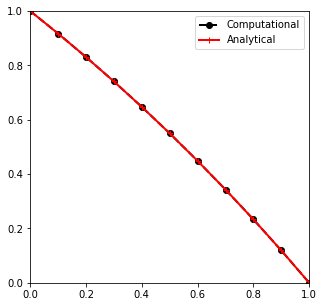

In [538]:
# comparison between Analytical solution and CFD: Central differencing scheme
pyplot.figure(figsize=(5, 5))
pyplot.plot(x, phi, color='black', linestyle='dashed', lw=2, marker='o', markersize=6,label='Computational')
pyplot.plot(x, phi_exact, color='red', linestyle='solid', lw=2, marker='+', markersize=6, label='Analytical')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1]);
pyplot.legend();